In [1]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")


In [2]:
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 1. 40-mers

## 1A. PADI

In [3]:
padi = pd.read_excel("../data/41586_2024_7707_MOESM2_ESM.xlsx")
padi = padi[["Fragment Sequence", "PADI Score"]]
padi = padi.rename(columns = {"Fragment Sequence" : "seq", "PADI Score": "score"})
padi["screen"] = "padi"
padi["seq"] = padi["seq"].str.strip().str.upper()
padi = padi.drop_duplicates(subset = "seq")
padi

,seq,score,screen
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi
...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi


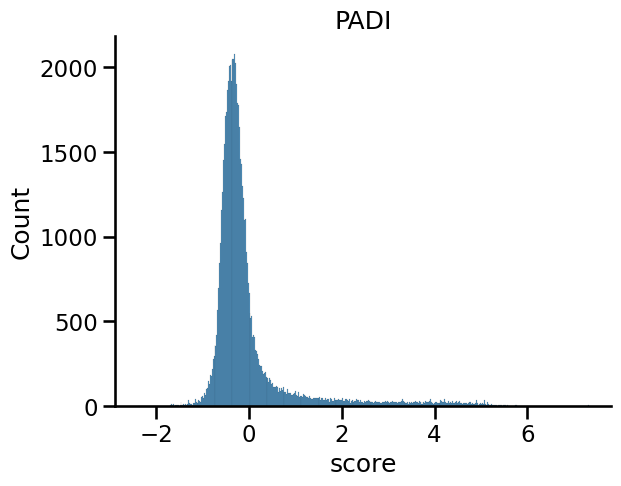

In [4]:
sns.histplot(data = padi, x = "score")
sns.despine()
plt.title("PADI");

## 1B. GCN4

In [5]:
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4.columns

Index(['ADseq', 'Name', 'ArrayDNA', 'Activity_BioRepA_BYS4',
       'Activity_BioRepB_BYS4', 'TotalReads_BioRepA_BYS4',
       'TotalReads_BioRepB_BYS4', 'BioRep_A_GFP_TotalReads', 'BioRep_A_GFP',
       'BioRep_B_GFP_TotalReads', 'BioRep_B_GFP',
       'BioRep_A_mCherry_TotalReads', 'BioRep_A_mCherry',
       'BioRep_B_mCherry_TotalReads', 'BioRep_B_mCherry',
       'Activity_BYS4_BioRepAverage', 'Stdev_BYS4_BioReps',
       'Activity_SCglucose', 'Start', 'Recovered', 'Charge',
       'HydrophobicityKD', 'HydrophobicityWW', 'Kappa', 'Omega', 'OmegaWFY_DE',
       'OmegaWFYL_DE', 'OmegaWF_D', 'Disorder', 'A', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Aromatics', 'WFYL', 'W..LF', '[WFYL]..[WFYL][WFYL]',
       '[WFL]..[WFL][WFL]', '[DE][WFY]', '[DE][WF]', '[DE][L]', '[DE].[WFY]',
       '[DE]..[WFY]', 'FF', 'F.F', 'F..F', '[FY].....[FY]DF', 'D.F', 'D..F',
       'FD', 'F.D', 'F..D', 'MF.Y..L', 'M..Y..L', 'SP',
       '[

In [6]:
gcn4 = gcn4[["ADseq", "Activity_SCglucose"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_SCglucose": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq")
gcn4

,seq,score,screen
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4
...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4


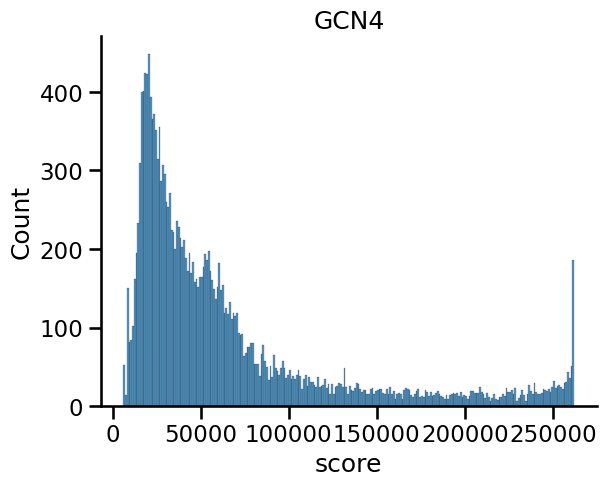

In [7]:
sns.histplot(gcn4["score"], binwidth = 1000)
sns.despine()
plt.title("GCN4");

## 1C. Sog1

In [8]:
sog1_sort3 = pd.read_csv("../data/SK_recalc_scores.csv")
sog1_sort3 = sog1_sort3.rename(columns = {"ProteinSeq" : "seq", "Activity_S3_1" : "score"})
sog1_sort3 = sog1_sort3[["seq", "score"]]
sog1_sort3["seq"] = sog1_sort3["seq"].str.strip().str.upper()
sog1_sort3["screen"] = "sog1_sort3"
sog1_sort3 = sog1_sort3.drop_duplicates(subset = "seq")
sog1_sort3

,seq,score,screen
0,AAAAAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,247.596326,sog1_sort3
1,AAAAAAAACQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2420.236680,sog1_sort3
2,AAAAAAAAGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,544.103037,sog1_sort3
3,AAAAAAAANIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,391.240450,sog1_sort3
4,AAAAAHLGPEDFKRDLEECQAAAADPSNIELDTPPEFRLS,428.387407,sog1_sort3
...,...,...,...
6788,YSLFDDPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,1627.763143,sog1_sort3
6789,YSLFDSPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,3249.679912,sog1_sort3
6790,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,1304.650547,sog1_sort3
6791,YSTGTRKRRKILDDDLGDVRWHKTGRTKPVILDGVQRGCK,2263.458216,sog1_sort3


In [9]:
sog1_sort2 = pd.read_csv("../data/Sog1_library1_sort2.csv")
sog1_sort2 = sog1_sort2.rename(columns = {"AAseq" : "seq"})
sog1_sort2["seq"] = sog1_sort2["seq"].str.strip().str.upper()
sog1_sort2["screen"] = "sog1_sort2"
sog1_sort2 = sog1_sort2.drop_duplicates(subset = "seq")
sog1_sort2

,seq,Activity_GFP8,Activity_ratio2,screen
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,636.156202,37675.082479,sog1_sort2
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,602.696194,41200.368672,sog1_sort2
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,381.502348,30737.744889,sog1_sort2
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,347.155741,50192.512730,sog1_sort2
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,437.694050,60000.227476,sog1_sort2
...,...,...,...,...
1107,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,4444.689683,174246.501323,sog1_sort2
1108,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,7960.852191,243705.211234,sog1_sort2
1109,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,2769.615372,112896.558185,sog1_sort2
1110,EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN,5603.789064,230752.268974,sog1_sort2


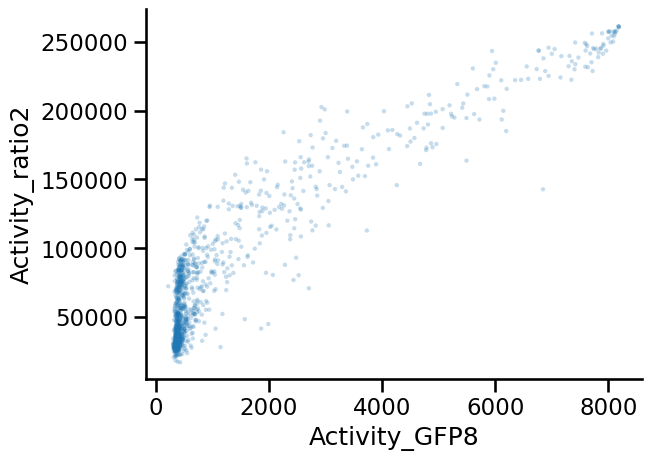

In [10]:
sns.scatterplot(data = sog1_sort2, x = "Activity_GFP8", y = "Activity_ratio2", alpha = 0.25, s = 10, edgecolor = 'none')
sns.despine()

In [11]:
sog1_sort2ratio = sog1_sort2.rename(columns = {"Activity_ratio2" : "score"})
sog1_sort2ratio = sog1_sort2ratio[["seq", "score"]]
sog1_sort2ratio

,seq,score
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,37675.082479
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,41200.368672
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,30737.744889
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,50192.512730
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,60000.227476
...,...,...
1107,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,174246.501323
1108,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,243705.211234
1109,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,112896.558185
1110,EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN,230752.268974


Text(0.5, 0, 'Ratio')

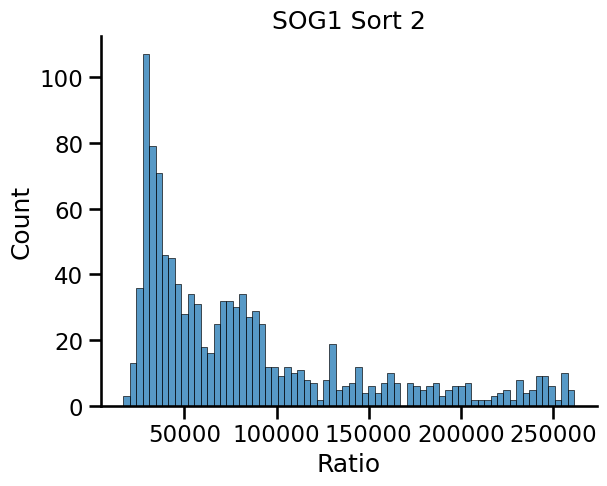

In [12]:
sns.histplot(sog1_sort2ratio["score"], bins = 70)
sns.despine()
plt.title("SOG1 Sort 2");
plt.xlabel("Ratio")

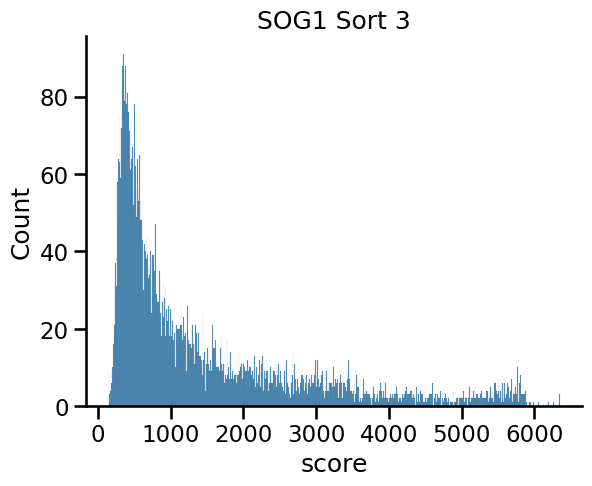

In [13]:
sns.histplot(sog1_sort3["score"], binwidth = 10)
sns.despine()
plt.title("SOG1 Sort 3");

## 1D. Controls library

In [14]:
controls = pd.read_csv("../data/Controls_Library_Sorted_with_SynADs.csv")
controls = controls.rename(columns = {"AAseq" : "seq", "SimpleAverage" : "score"})
controls = controls[["seq", "score"]]
controls["seq"] = controls["seq"].str.strip().str.upper()
controls["screen"] = "controls"
controls = controls.drop_duplicates(subset = "seq")
controls

,seq,score,screen
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls
...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls


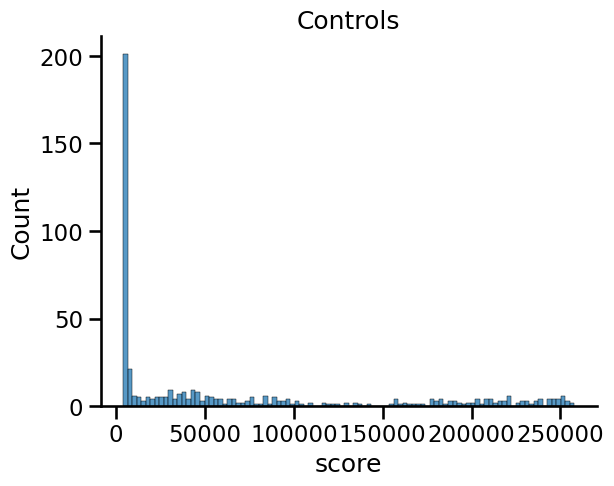

In [15]:
sns.histplot(controls["score"], bins = 100)
sns.despine()
plt.title("Controls");

## 1E. Synthetics

,seq,score,screen
0,AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,25075.335066,controls_syn
1,AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,42429.450978,controls_syn
2,AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,167550.966119,controls_syn
3,AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,109426.029848,controls_syn
4,AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,56143.316707,controls_syn
...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn


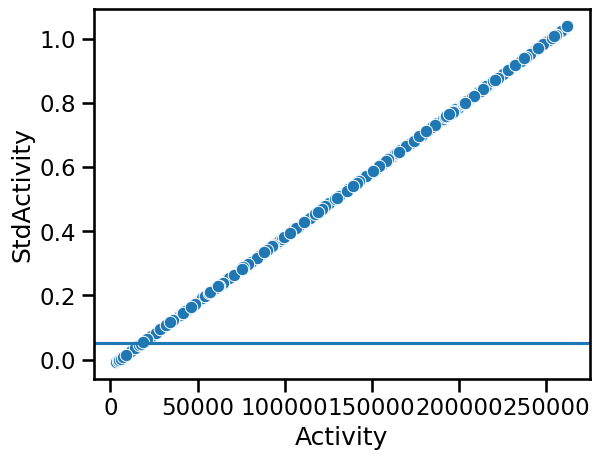

In [16]:
# Threshold = 0.057436713684575334 for std
# 19,530 for activity
controls_syn = pd.read_csv("../data/SynAD_Glu_Filtered_ActivityCtrlStd_replicateactivities_simpleave.csv")
sns.scatterplot(data = controls_syn, x = "Activity", y = "StdActivity")
plt.axhline(0.05)
controls_syn = controls_syn.rename(columns = {"AAseq" : "seq", "Activity" : "score"})
controls_syn = controls_syn[["seq", "score"]]
controls_syn["seq"] = controls_syn["seq"].str.strip().str.upper()
controls_syn["screen"] = "controls_syn"
controls_syn = controls_syn.drop_duplicates(subset = "seq")
controls_syn

<Axes: xlabel='score', ylabel='Count'>

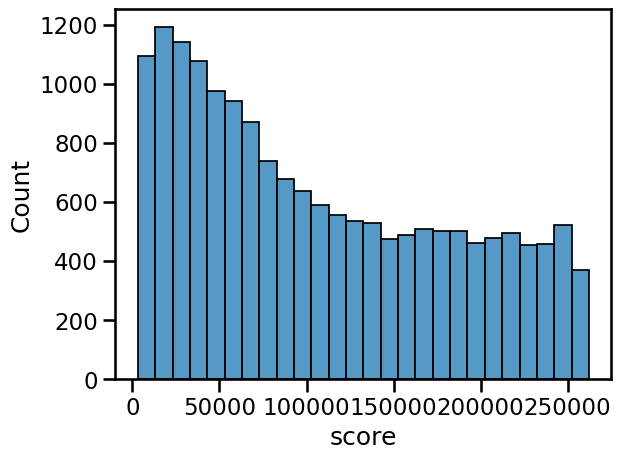

In [17]:
sns.histplot(data = controls_syn, x = "score")

In [18]:
# Venn diagram of overlapping sequences

In [49]:
from itertools import combinations

padi
gcn4
sog1_sort2ratio
controls_syn
# Create a dictionary of datasets
datasets = {"padi": padi, "gcn4": gcn4, "sog1_sort2ratio": sog1_sort2ratio, "controls_syn": controls_syn}

# Generate all combinations of 2 datasets
combos = combinations(datasets.keys(), 2)

# Find overlaps for each combination
overlaps = {}
for combo in combos:
    set1, set2 = combo
    overlap = pd.merge(datasets[set1], datasets[set2], on="seq", suffixes=(f"_{set1}", f"_{set2}"))
    overlaps[combo] = overlap

# Display overlaps as a formatted table with separate columns for combinations
overlap_table = pd.DataFrame([
    {"Dataset 1": combo[0], "Dataset 2": combo[1], "Overlap Count": len(overlap)}
    for combo, overlap in overlaps.items()
])

# Set a multi-index on the overlap table using 'Dataset 1' and 'Dataset 2'
overlap_table = overlap_table.set_index(["Dataset 1", "Dataset 2"])

# Display the table
display(overlap_table)

Overlap Count
Dataset 1       Dataset 2                     
padi            gcn4                         0
                sog1_sort2ratio            111
                controls_syn                 0
gcn4            sog1_sort2ratio             10
                controls_syn               482
sog1_sort2ratio controls_syn                 7

# 2. Overlap with sort 2 ratio

,seq,score_sog1_sort2ratio,score_padi,screen
0,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,50192.512730,-0.272920,padi
1,ITYQQQKLGENPDEGESSSGVRGGPTTPKTNTPTPPSLVD,32401.126691,-0.573854,padi
2,SEPHVLIEEFIRPVTEDVGINYTHPQNLPGANKDGVSVFF,107728.067479,-0.428033,padi
3,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,37279.642860,-0.205281,padi
4,PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE,35466.670030,-0.790868,padi
...,...,...,...,...
106,DLKMFDPFFEELDSIPEAALGKMWSKKARMDEEFVVNLSE,217607.570673,2.234280,padi
107,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,114521.567731,0.088566,padi
108,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,164556.136834,2.009163,padi
109,FEPTDEDIIEFLEAKCGIGGSEPHVLIEEFIRPVTEDVGI,243431.099680,4.112089,padi


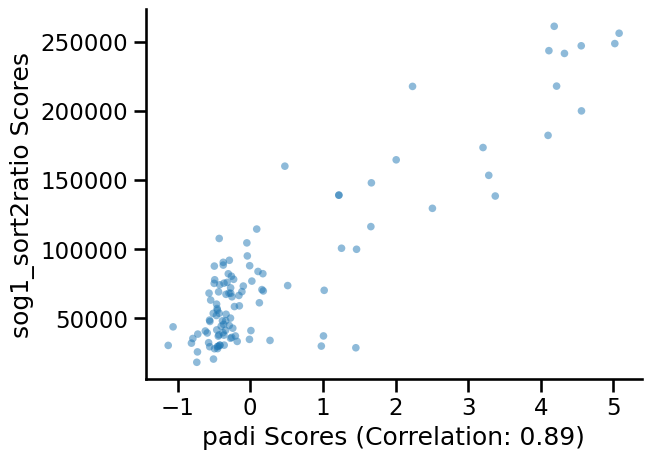

In [61]:
# Merge the dataframes on 'seq'
sog1_sort2ratio_padi = pd.merge(sog1_sort2ratio, padi, on="seq", suffixes = ("_sog1_sort2ratio", "_padi"))
display(sog1_sort2ratio_padi)

# Scatter plot
sns.scatterplot(data=sog1_sort2ratio_padi, x="score_padi", y="score_sog1_sort2ratio", edgecolor='none', alpha=0.5, s=30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2ratio_padi.dropna()["score_padi"], sog1_sort2ratio_padi.dropna()["score_sog1_sort2ratio"])
plt.xlabel(f"padi Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2ratio Scores")
sns.despine()

,seq,score_sog1_sort2ratio,score_gcn4,screen
0,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,28745.072808,17261.58387,gcn4
1,STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK,27543.557030,18345.73970,gcn4
2,STDSTPMFEYEGLEDNSKEWTSLFDNDIPVTTDDVSPADK,166157.850241,64997.04148,gcn4
3,STDSTPMFEYENLENNSKEWTSLFDNDIPVTTDDVSLADK,162443.439801,122464.99690,gcn4
4,PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,109363.718111,16429.97458,gcn4
5,STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF,201111.677406,150214.68590,gcn4
6,STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK,178085.368901,137982.57010,gcn4
7,STDSTPMFDYDNLEDNSKDWTSLFDNDIPVTTDDVSLADK,205281.104307,166175.36020,gcn4
8,PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI,261419.548044,260331.73400,gcn4
9,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,254667.274654,258453.39020,gcn4


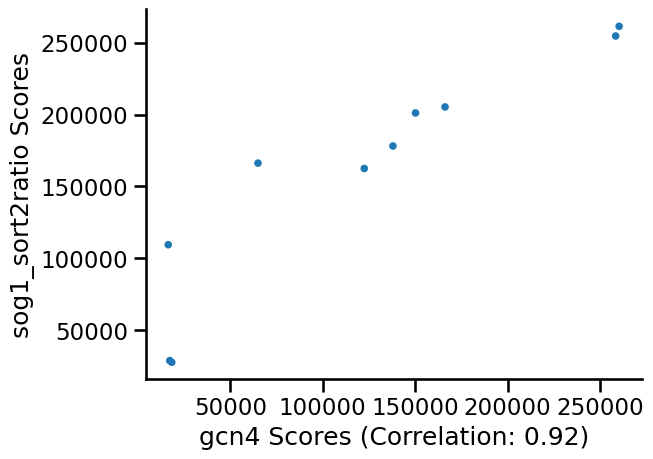

In [62]:
# Merge the dataframes on 'seq'
sog1_sort2ratio_gcn4 = pd.merge(sog1_sort2ratio, gcn4, on="seq", suffixes = ("_sog1_sort2ratio", "_gcn4"))
display(sog1_sort2ratio_gcn4)

# Scatter plot
sns.scatterplot(data=sog1_sort2ratio_gcn4, x="score_gcn4", y="score_sog1_sort2ratio", edgecolor='none', alpha=1, s=30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2ratio_gcn4.dropna()["score_gcn4"], sog1_sort2ratio_gcn4.dropna()["score_sog1_sort2ratio"])
plt.xlabel(f"gcn4 Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2ratio Scores")
sns.despine()

,seq,score_sog1_sort2ratio,score_sog1_sort3,screen
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,37675.082479,596.496315,sog1_sort3
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,41200.368672,973.266208,sog1_sort3
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,30737.744889,354.172556,sog1_sort3
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,50192.512730,360.219385,sog1_sort3
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,60000.227476,404.573933,sog1_sort3
...,...,...,...,...
1105,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,254667.274654,4316.725533,sog1_sort3
1106,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,174246.501323,4063.411884,sog1_sort3
1107,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,243705.211234,3973.450589,sog1_sort3
1108,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,112896.558185,1536.766810,sog1_sort3


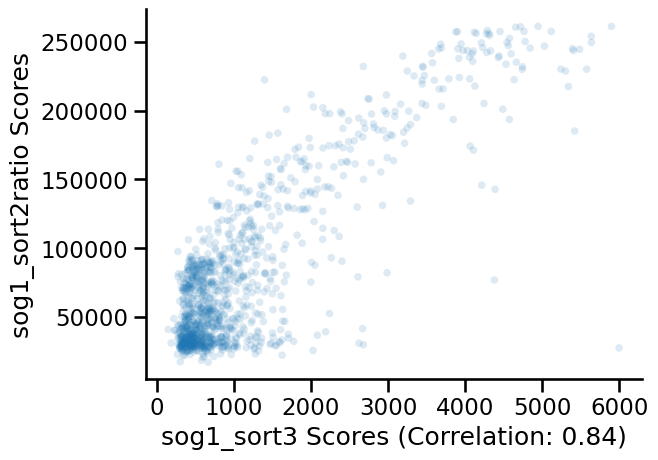

In [63]:
# Merge the dataframes on 'seq'
sog1_sort2ratio_sog1_sort3 = pd.merge(sog1_sort2ratio, sog1_sort3, on="seq", suffixes = ("_sog1_sort2ratio", "_sog1_sort3"))
display(sog1_sort2ratio_sog1_sort3)

# Scatter plot
sns.scatterplot(data=sog1_sort2ratio_sog1_sort3, x="score_sog1_sort3", y="score_sog1_sort2ratio", edgecolor='none', alpha=0.15, s=30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2ratio_sog1_sort3.dropna()["score_sog1_sort3"], sog1_sort2ratio_sog1_sort3.dropna()["score_sog1_sort2ratio"])
plt.xlabel(f"sog1_sort3 Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2ratio Scores")
sns.despine()

,seq,score_sog1_sort2ratio,score_controls_syn,screen
0,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,28745.072808,4861.135792,controls_syn
1,STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK,27543.557030,4463.296310,controls_syn
2,PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,109363.718111,15277.058963,controls_syn
3,STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF,201111.677406,45422.092004,controls_syn
4,STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK,178085.368901,47109.769098,controls_syn
5,PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI,261419.548044,220767.013244,controls_syn
6,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,254667.274654,158106.387699,controls_syn


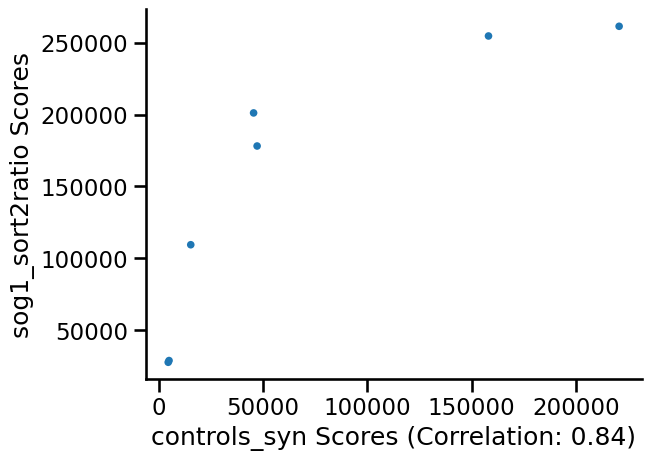

In [64]:

# Merge the dataframes on 'seq'
sog1_sort2ratio_controls_syn = pd.merge(sog1_sort2ratio, controls_syn, on="seq", suffixes = ("_sog1_sort2ratio", "_controls_syn"))
display(sog1_sort2ratio_controls_syn)

# Scatter plot
sns.scatterplot(data=sog1_sort2ratio_controls_syn, x="score_controls_syn", y="score_sog1_sort2ratio", edgecolor='none', alpha=1, s=30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2ratio_controls_syn.dropna()["score_controls_syn"], sog1_sort2ratio_controls_syn.dropna()["score_sog1_sort2ratio"])
plt.xlabel(f"controls_syn Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2ratio Scores")
sns.despine()

In [65]:
# Create copies of the dataframes to avoid mutating the original ones
sog1_sort2ratio_padi_clean = sog1_sort2ratio_padi.dropna()
sog1_sort2ratio_gcn4_clean = sog1_sort2ratio_gcn4.dropna()
sog1_sort2ratio_controls_syn_clean = sog1_sort2ratio_controls_syn.dropna()

In [66]:
def plot_3_ratio_scatters():
    # Plan: can use Sog1 Sort 2 ratio scores to normalize all libraries!

    fig, axs = plt.subplots(1,3 , sharey = True, figsize = (12, 4), dpi = 300)

    sns.scatterplot(data=sog1_sort2ratio_padi, y="score_sog1_sort2ratio", x="score_padi", edgecolor = 'none', alpha = 0.5, s = 10, ax = axs[0])

    axs[0].set_xlabel("PADI")
    axs[0].set_ylabel("Sog1 Sort 2")

    sns.scatterplot(data=sog1_sort2ratio_gcn4, y="score_sog1_sort2ratio", x="score_gcn4", edgecolor = 'none', alpha = 1, s = 10, ax = axs[1])
    axs[1].set_xlabel("GCN4")

    sns.scatterplot(data = sog1_sort2ratio_controls_syn, y="score_sog1_sort2ratio", x="score_controls_syn", edgecolor = 'none', alpha = 1, s = 10, ax = axs[2])
    axs[2].set_xlabel("controls_syn")

   
    blue_color = sns.color_palette('tab10')[0]

    # Add correlations as text on each plot
    axs[0].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2ratio_padi_clean['score_sog1_sort2ratio'], sog1_sort2ratio_padi_clean['score_padi'])[0]:.2f}", 
                transform=axs[0].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

    axs[1].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2ratio_gcn4_clean['score_sog1_sort2ratio'], sog1_sort2ratio_gcn4_clean['score_gcn4'])[0]:.2f}", 
                transform=axs[1].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

    axs[2].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2ratio_controls_syn_clean['score_sog1_sort2ratio'], sog1_sort2ratio_controls_syn_clean['score_controls_syn'])[0]:.2f}", 
                transform=axs[2].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

    sns.despine()
    plt.tight_layout(pad = 0)
    return axs



In [67]:
# Ensure no test data is saved by setting test_size to 0 in train_test_split
def fit_linear_reg(df, x, y):
    # Clean the dataframe by dropping NaN values
    df_cleaned = df.dropna()

    X = df_cleaned[[x]]  # Independent variable(s)
    y = df_cleaned[y]    # Dependent variable

    # Fit linear regression without splitting into train/test
    model = LinearRegression()
    model.fit(X, y)

    # Predict
    y_pred = model.predict(X)

    # Evaluate
    r2 = r2_score(y, y_pred)

    return model, r2

def plot_linear_reg(df, x, y, ax):
    # Fit the linear regression model
    model, r2 = fit_linear_reg(df=df, x=x, y=y)
    
    # Add R^2 and equation to the plot
    ax.text(0.95, 0.05, f"R^2 = {r2:.2f}\ny = {model.intercept_:.2f} + {model.coef_[0]:.2f}x", 
            transform=ax.transAxes, fontsize='x-small', verticalalignment='bottom', 
            color=sns.color_palette('colorblind')[1], ha='right', font= 'monospace')

    # Create linspace for smooth regression line
    x_min, x_max = df[x].min(), df[x].max()
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)  # 100 points evenly spaced
    y_fit = model.predict(x_range)

    # Plot the regression line
    ax.plot(x_range, y_fit, color=sns.color_palette('colorblind')[1], lw=3, alpha=0.5)


In [68]:
from sklearn.preprocessing import PolynomialFeatures

def fit_log_reg(df, x, y):
    # Drop NaNs and filter out non-positive x values (log is undefined for x <= 0)
    df_cleaned = df.dropna()
    df_cleaned = df_cleaned[df_cleaned[x] > 0]

    X = np.log(df_cleaned[[x]]) # Take the natural log of x
    y_vals = df_cleaned[y]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y_vals, test_size=0.2, random_state=42)

    # Fit linear regression on log-transformed x
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y_vals, y_pred)
    
    return model, r2

def plot_log_reg(df, x, y, ax):
    # Fit the logarithmic regression model
    model, r2 = fit_log_reg(df, x, y)

    # Create range of x values for smooth curve, avoiding x <= 0
    x_vals = df[df[x] > 0][x]
    x_min, x_max = x_vals.min(), x_vals.max()
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    y_fit = model.predict(np.log(x_range))

    # Plot the regression curve
    ax.plot(x_range, y_fit, color=sns.color_palette('colorblind')[1], lw=3, alpha=0.5)

    # Annotate R^2 and equation
    intercept = model.intercept_
    coef = model.coef_[0]
    eqn = f"y = {intercept:.2f} + {coef:.2f}·ln(x)"
    ax.text(0.95, 0.05, f"R² = {r2:.2f}\n{eqn}", 
            transform=ax.transAxes, fontsize='x-small', verticalalignment='bottom', 
            color=sns.color_palette('colorblind')[1], ha='right', font = 'monospace')

array([<Axes: xlabel='PADI', ylabel='Sog1 Sort 2'>,
       <Axes: xlabel='GCN4', ylabel='score_sog1_sort2ratio'>,
       <Axes: xlabel='controls_syn', ylabel='score_sog1_sort2ratio'>],
      dtype=object)

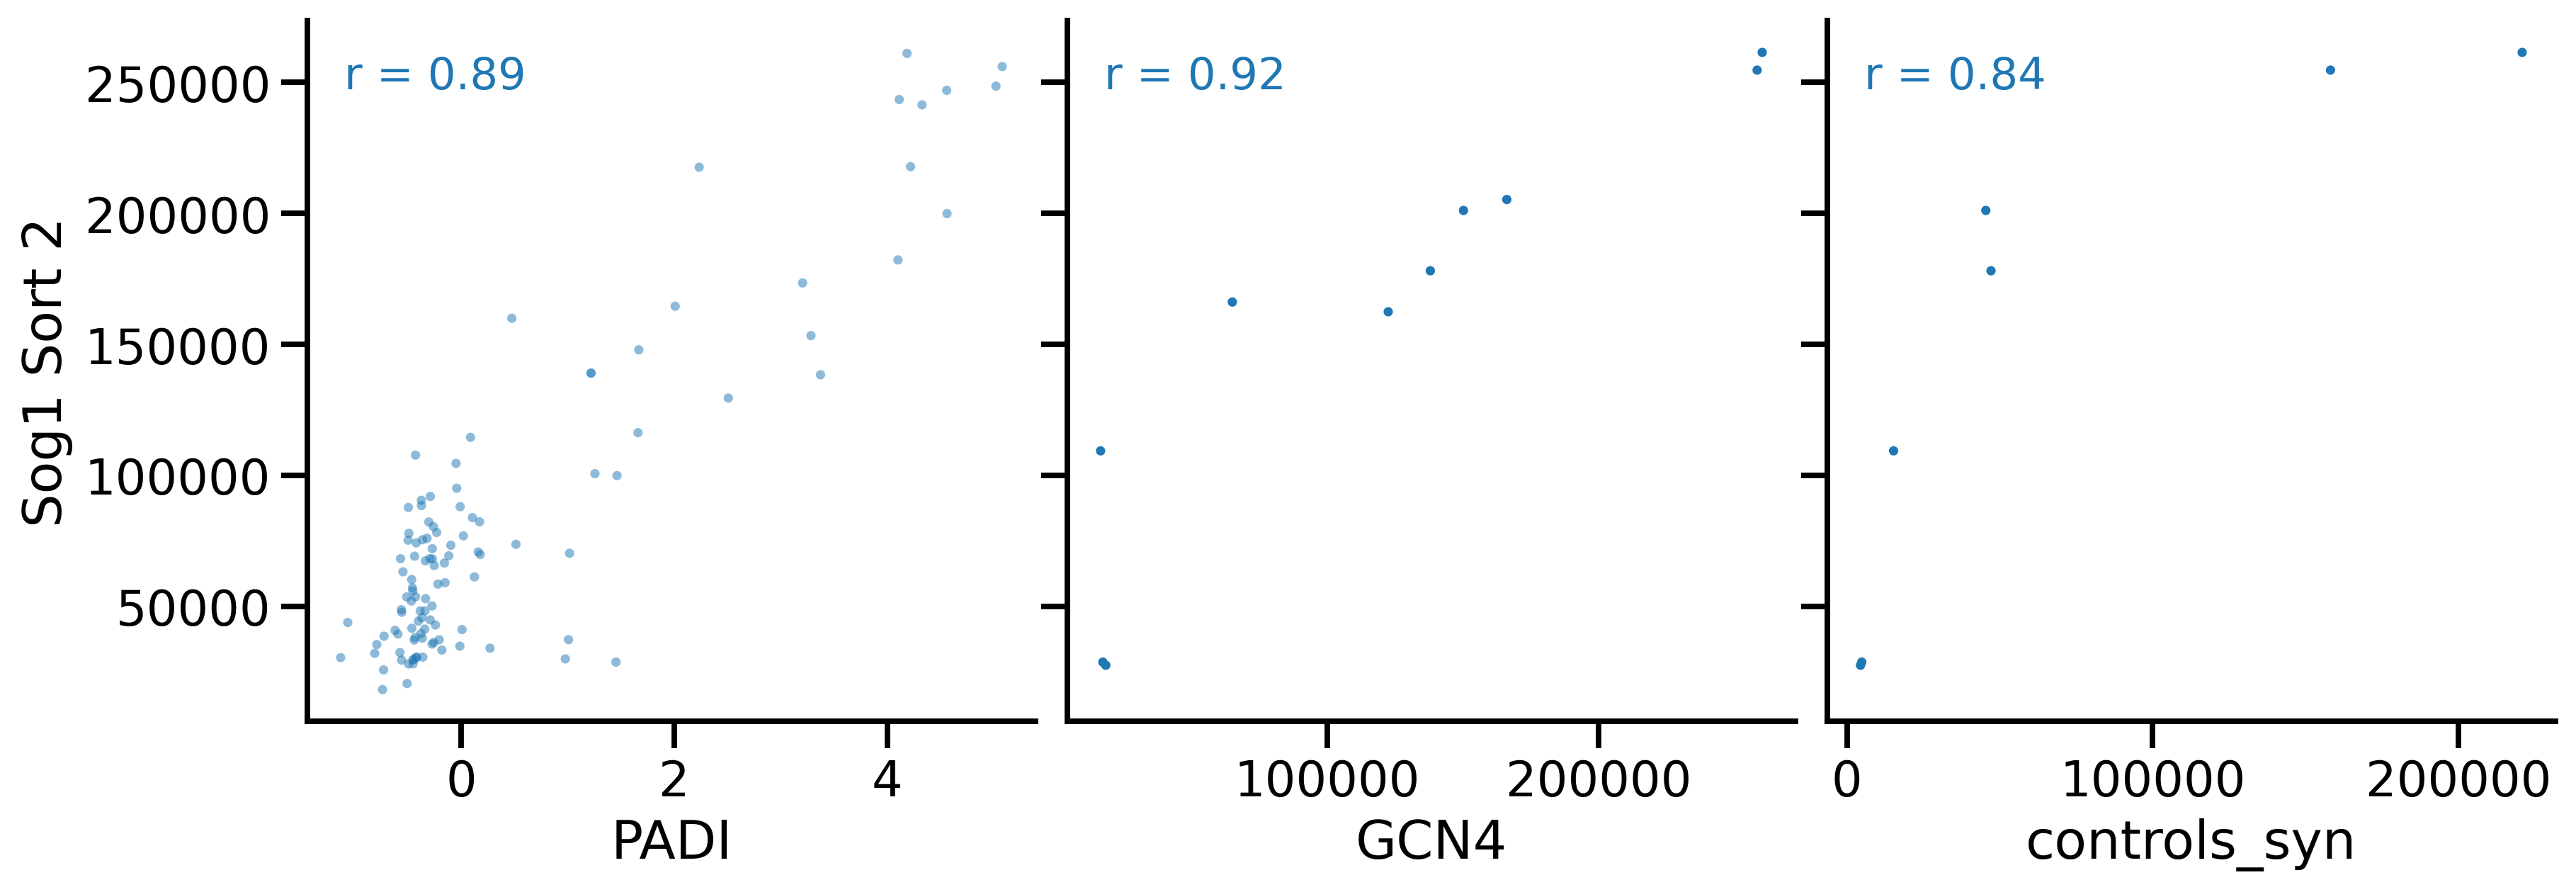

In [69]:
plot_3_ratio_scatters()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


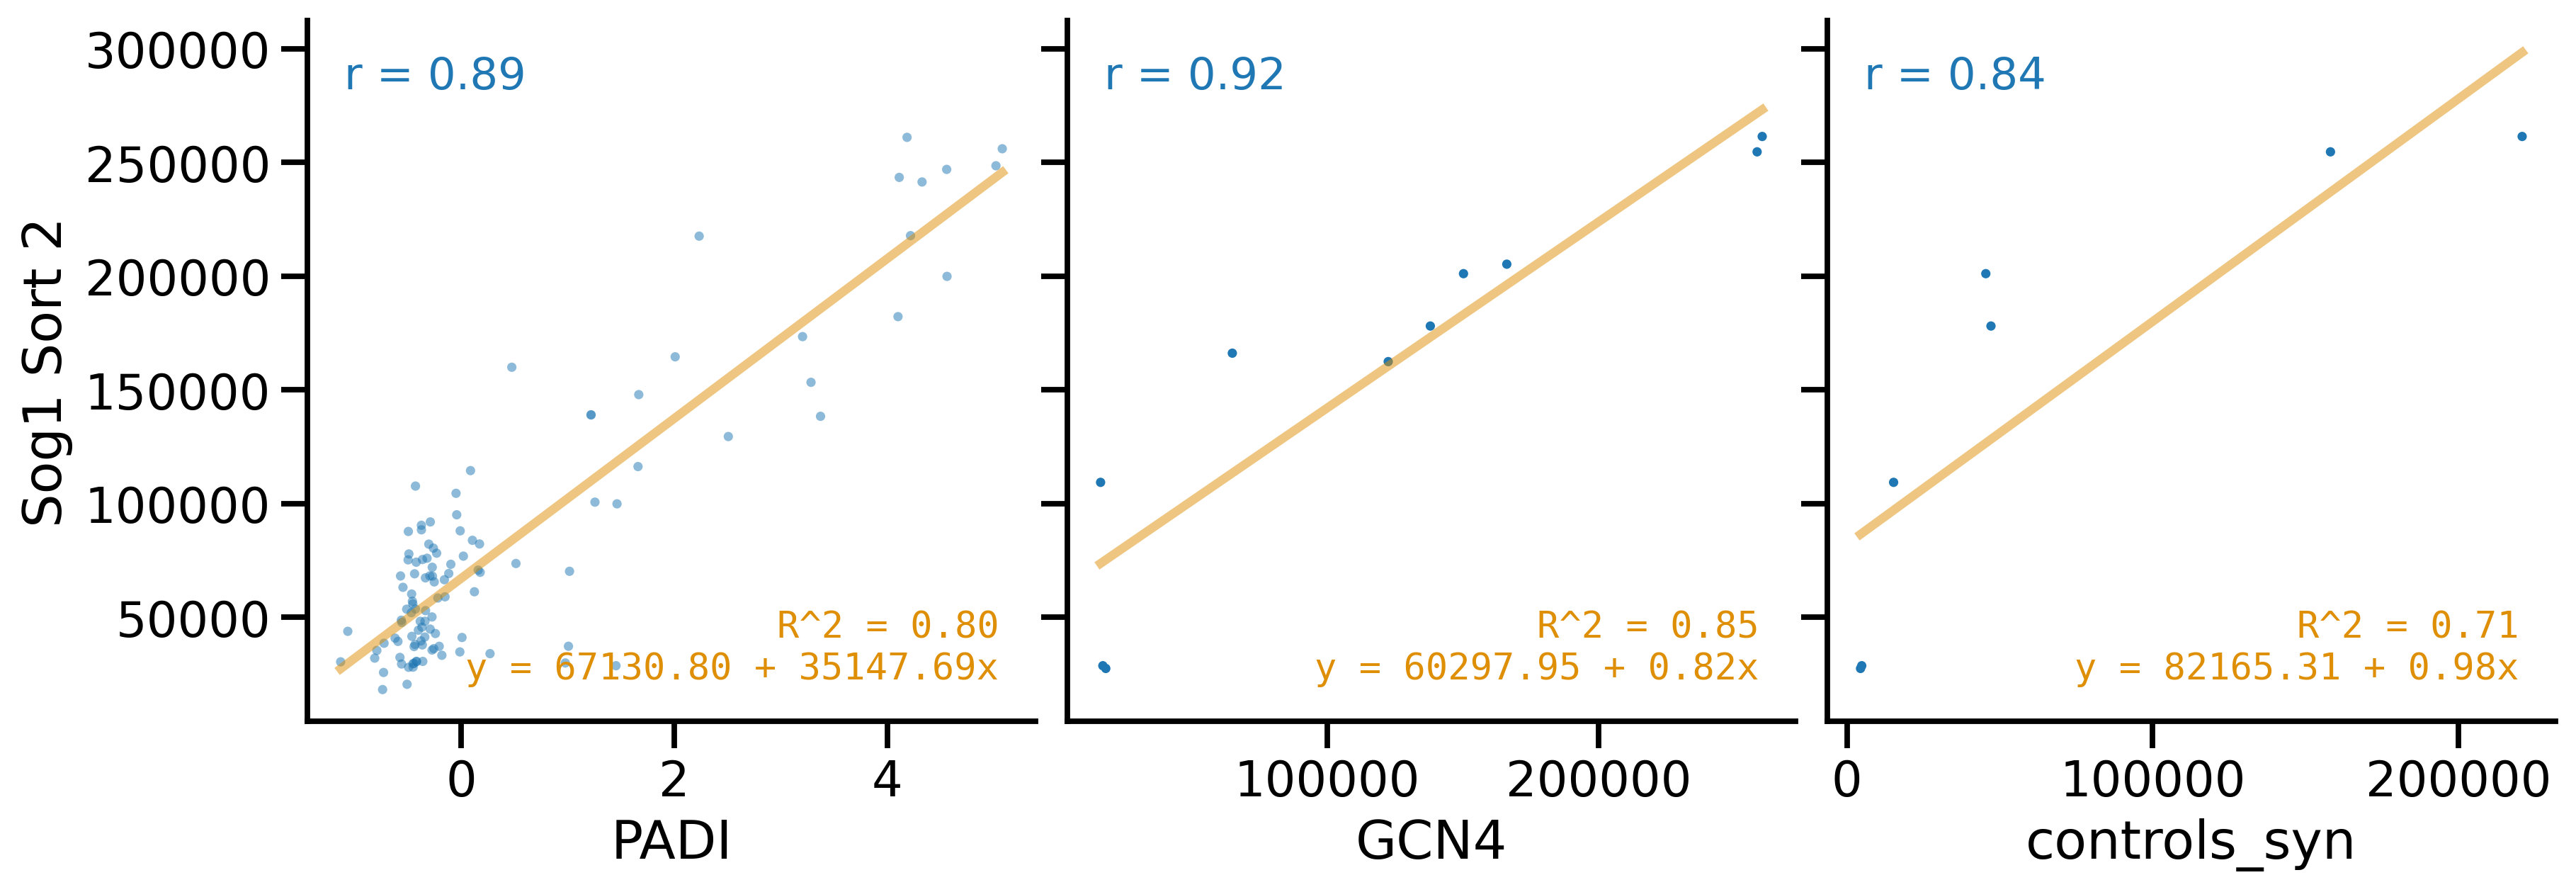

In [70]:
axs = plot_3_ratio_scatters()
plot_linear_reg(sog1_sort2ratio_padi_clean, y="score_sog1_sort2ratio", x="score_padi", ax=axs[0])
plot_linear_reg(sog1_sort2ratio_gcn4_clean, y="score_sog1_sort2ratio", x="score_gcn4", ax=axs[1])
plot_linear_reg(sog1_sort2ratio_controls_syn_clean, y="score_sog1_sort2ratio", x="score_controls_syn", ax=axs[2])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


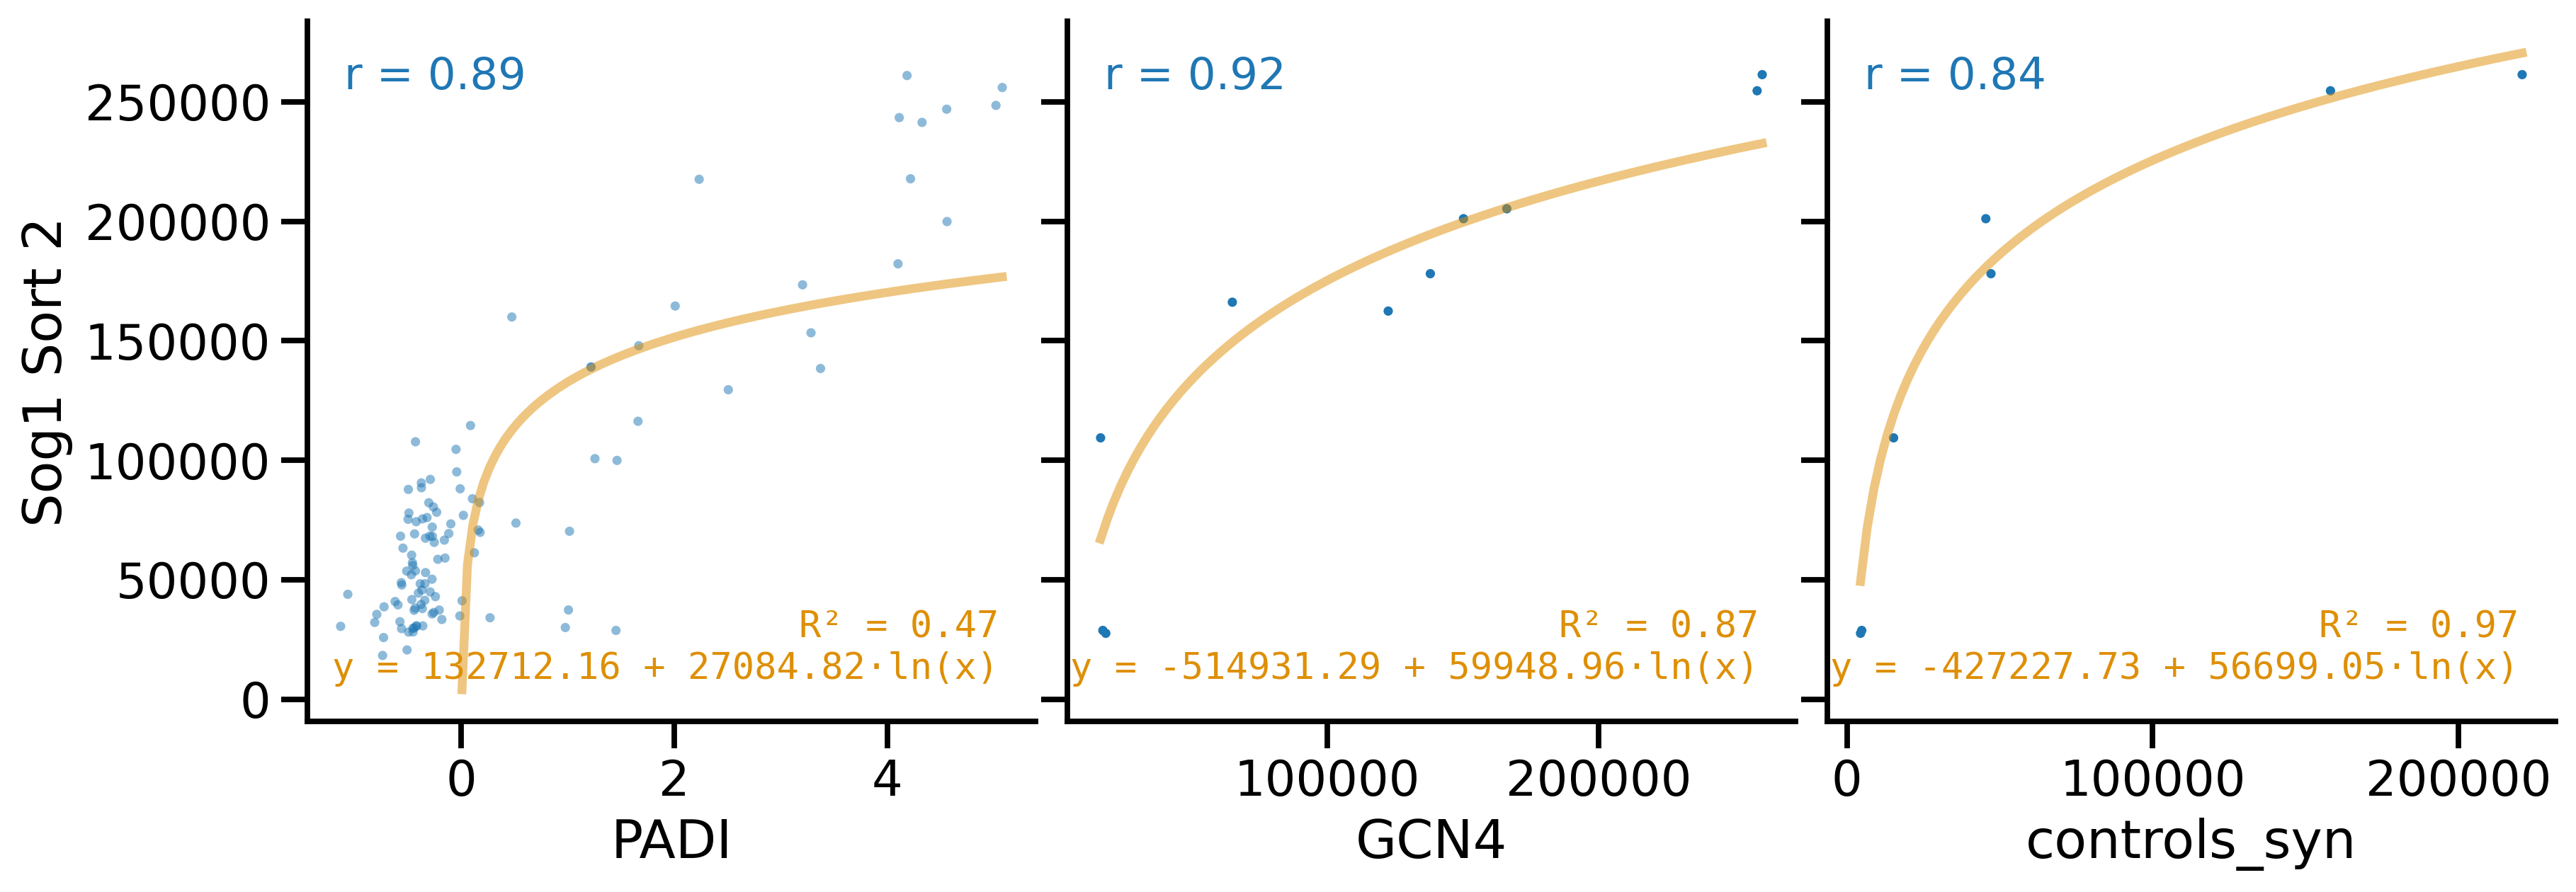

In [71]:
axs = plot_3_ratio_scatters()
plot_log_reg(sog1_sort2ratio_padi_clean, y="score_sog1_sort2ratio", x="score_padi", ax=axs[0])
plot_log_reg(sog1_sort2ratio_gcn4_clean, y="score_sog1_sort2ratio", x="score_gcn4", ax=axs[1])
plot_log_reg(sog1_sort2ratio_controls_syn_clean, y="score_sog1_sort2ratio", x="score_controls_syn", ax=axs[2])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


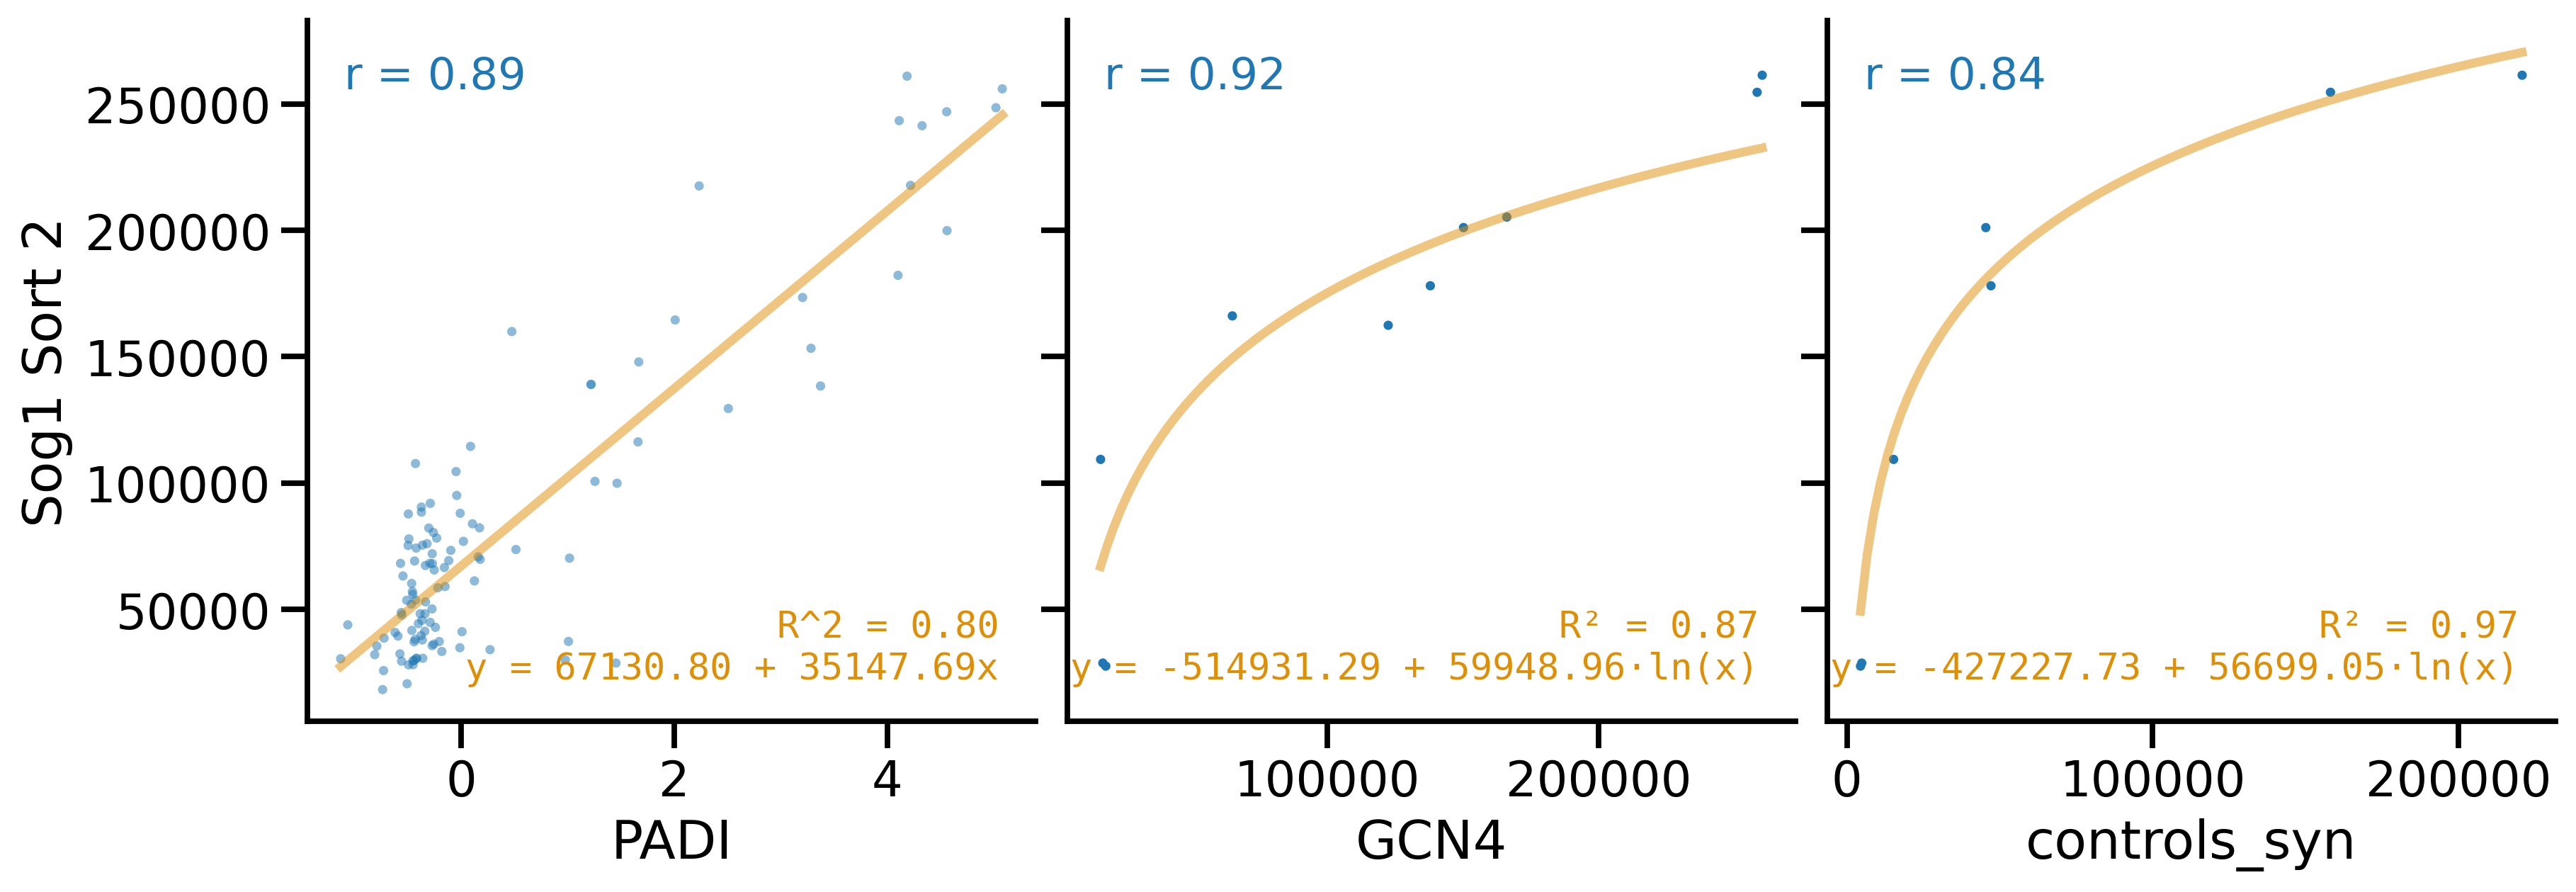

In [411]:
axs = plot_3_ratio_scatters()
plot_linear_reg(sog1_sort2ratio_padi_clean, y="score_sog1_sort2ratio", x="score_padi", ax=axs[0])
plot_log_reg(sog1_sort2ratio_gcn4_clean, y="score_sog1_sort2ratio", x="score_gcn4", ax=axs[1])
plot_log_reg(sog1_sort2ratio_controls_syn_clean, y="score_sog1_sort2ratio", x="score_controls_syn", ax=axs[2])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


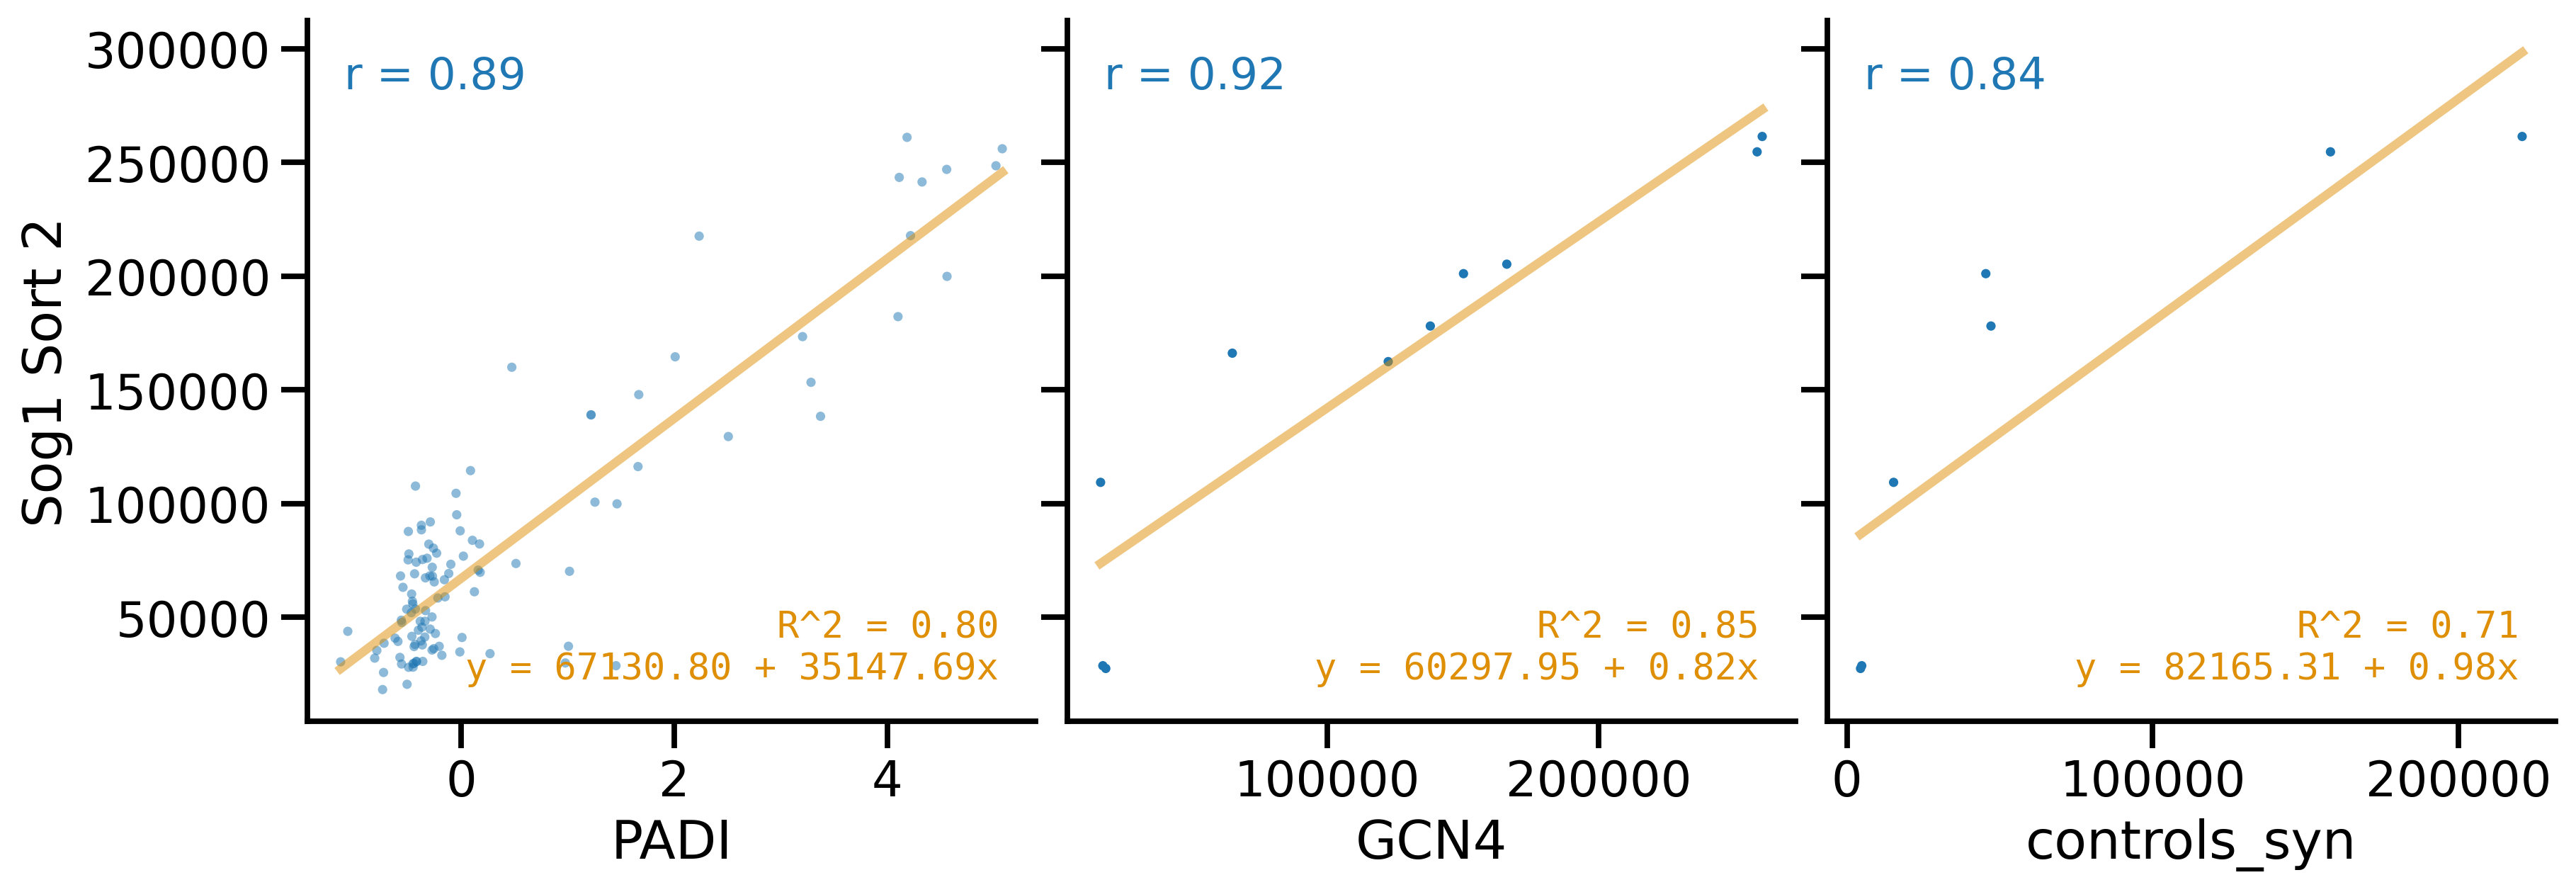

In [412]:
axs = plot_3_ratio_scatters()
plot_linear_reg(sog1_sort2ratio_padi_clean, y="score_sog1_sort2ratio", x="score_padi", ax=axs[0])
plot_linear_reg(sog1_sort2ratio_gcn4_clean, y="score_sog1_sort2ratio", x="score_gcn4", ax=axs[1])
plot_linear_reg(sog1_sort2ratio_controls_syn_clean, y="score_sog1_sort2ratio", x="score_controls_syn", ax=axs[2])


In [72]:
# PADI
model, r2 = fit_linear_reg(sog1_sort2ratio_padi, x="score_padi", y="score_sog1_sort2ratio")
padi = padi.dropna()
padi["sog1_sort2ratio_transform"] = model.predict(padi[["score"]].rename(columns = {"score" : "score_padi"}))
padi_threshold = model.predict([[1]])[0]
print("New threshold:", padi_threshold)
padi

New threshold: 102278.49003141561


/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_53641/1315487733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padi["sog1_sort2ratio_transform"] = model.predict(padi[["score"]].rename(columns = {"score" : "score_padi"}))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2ratio_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,102443.636559
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,87371.523607
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,56572.177353
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,70834.384286
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,61255.965495
...,...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi,62235.380565
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi,64861.970980
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi,52692.944322
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi,78723.199199


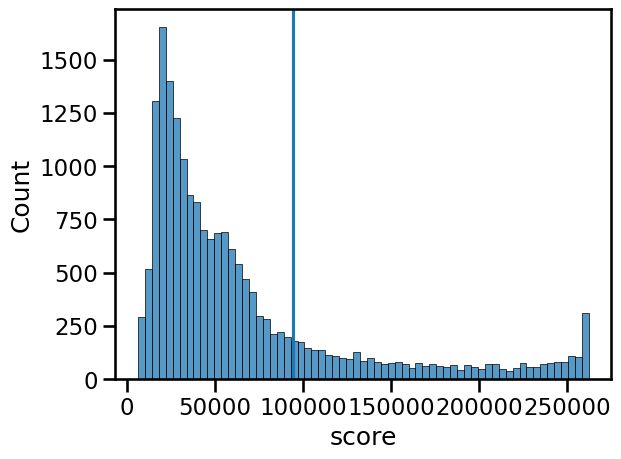

In [73]:
sns.histplot(gcn4["score"])
plt.axvline(94031)

In [97]:
# # GCN4
# model, r2 = fit_log_reg(sog1_sort2ratio_gcn4, y="score_sog1_sort2ratio", x="score_gcn4")
# gcn4 = gcn4.dropna()
# gcn4["sog1_sort2ratio_transform"] = model.predict(np.log(gcn4[["score"]].rename(columns={"score": "score_gcn4"})))
# gcn4_threshold = model.predict([[np.log(90000)]])[0]
# print("New threshold:", gcn4_threshold)
# gcn4

# GCN4
model, r2 = fit_linear_reg(sog1_sort2ratio_gcn4, y="score_sog1_sort2ratio", x="score_gcn4")
gcn4 = gcn4.dropna()
gcn4["sog1_sort2ratio_transform"] = model.predict(gcn4[["score"]].rename(columns = {"score" : "score_gcn4"}))
gcn4_threshold = model.predict([[90000]])[0]
print("New threshold:", gcn4_threshold)
gcn4

New threshold: 133909.46165907476


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2ratio_transform
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4,101888.255711
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,22153.46439,gcn4,78417.395770
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4,81491.433715
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4,78657.295076
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4,102421.237125
...,...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4,274449.989067
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4,274107.248724
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4,185273.013491
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4,152882.876028


In [98]:
# model, r2 = fit_log_reg(sog1_sort2ratio_controls_syn, y="score_sog1_sort2ratio", x="score_controls_syn")
# controls_syn = controls_syn.dropna()
# controls_syn["sog1_sort2ratio_transform"] = model.predict(np.log(controls_syn[["score"]].rename(columns = {"score" : "score_controls_syn"})))
# controls_syn_threshold = model.predict([[np.log(19530)]])[0]
# print("New threshold for controls + synthetics:", controls_syn_threshold)
# controls_syn

# Controls + Synthetics
model, r2 = fit_linear_reg(sog1_sort2ratio_controls_syn, y="score_sog1_sort2ratio", x="score_controls_syn")
controls_syn = controls_syn.dropna()
controls_syn["sog1_sort2ratio_transform"] = model.predict(controls_syn[["score"]].rename(columns = {"score" : "score_controls_syn"}))
controls_syn_threshold = model.predict([[19530]])[0]
print("New threshold for controls + synthetics:", controls_syn_threshold)
controls_syn

New threshold for controls + synthetics: 101292.60219797591


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2ratio_transform
0,AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,25075.335066,controls_syn,106723.591645
1,AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,42429.450978,controls_syn,123719.863151
2,AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,167550.966119,controls_syn,246261.354370
3,AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,109426.029848,controls_syn,189334.962777
4,AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,56143.316707,controls_syn,137150.946965
...,...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn,331629.038861
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn,314884.426095
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn,127270.850160
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn,220955.019178


In [99]:
combined = pd.concat([padi, gcn4, controls_syn])
combined

,seq,score,screen,sog1_sort2ratio_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,102443.636559
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,87371.523607
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,56572.177353
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,70834.384286
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,61255.965495
...,...,...,...,...
17265,YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,254716.006477,controls_syn,331629.038861
17266,YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,237618.847801,controls_syn,314884.426095
17267,YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,46055.201492,controls_syn,127270.850160
17268,YYSEQSCYLNFPPLDMFPALPSDLSGWVESMLSELNNPAS,141711.824042,controls_syn,220955.019178


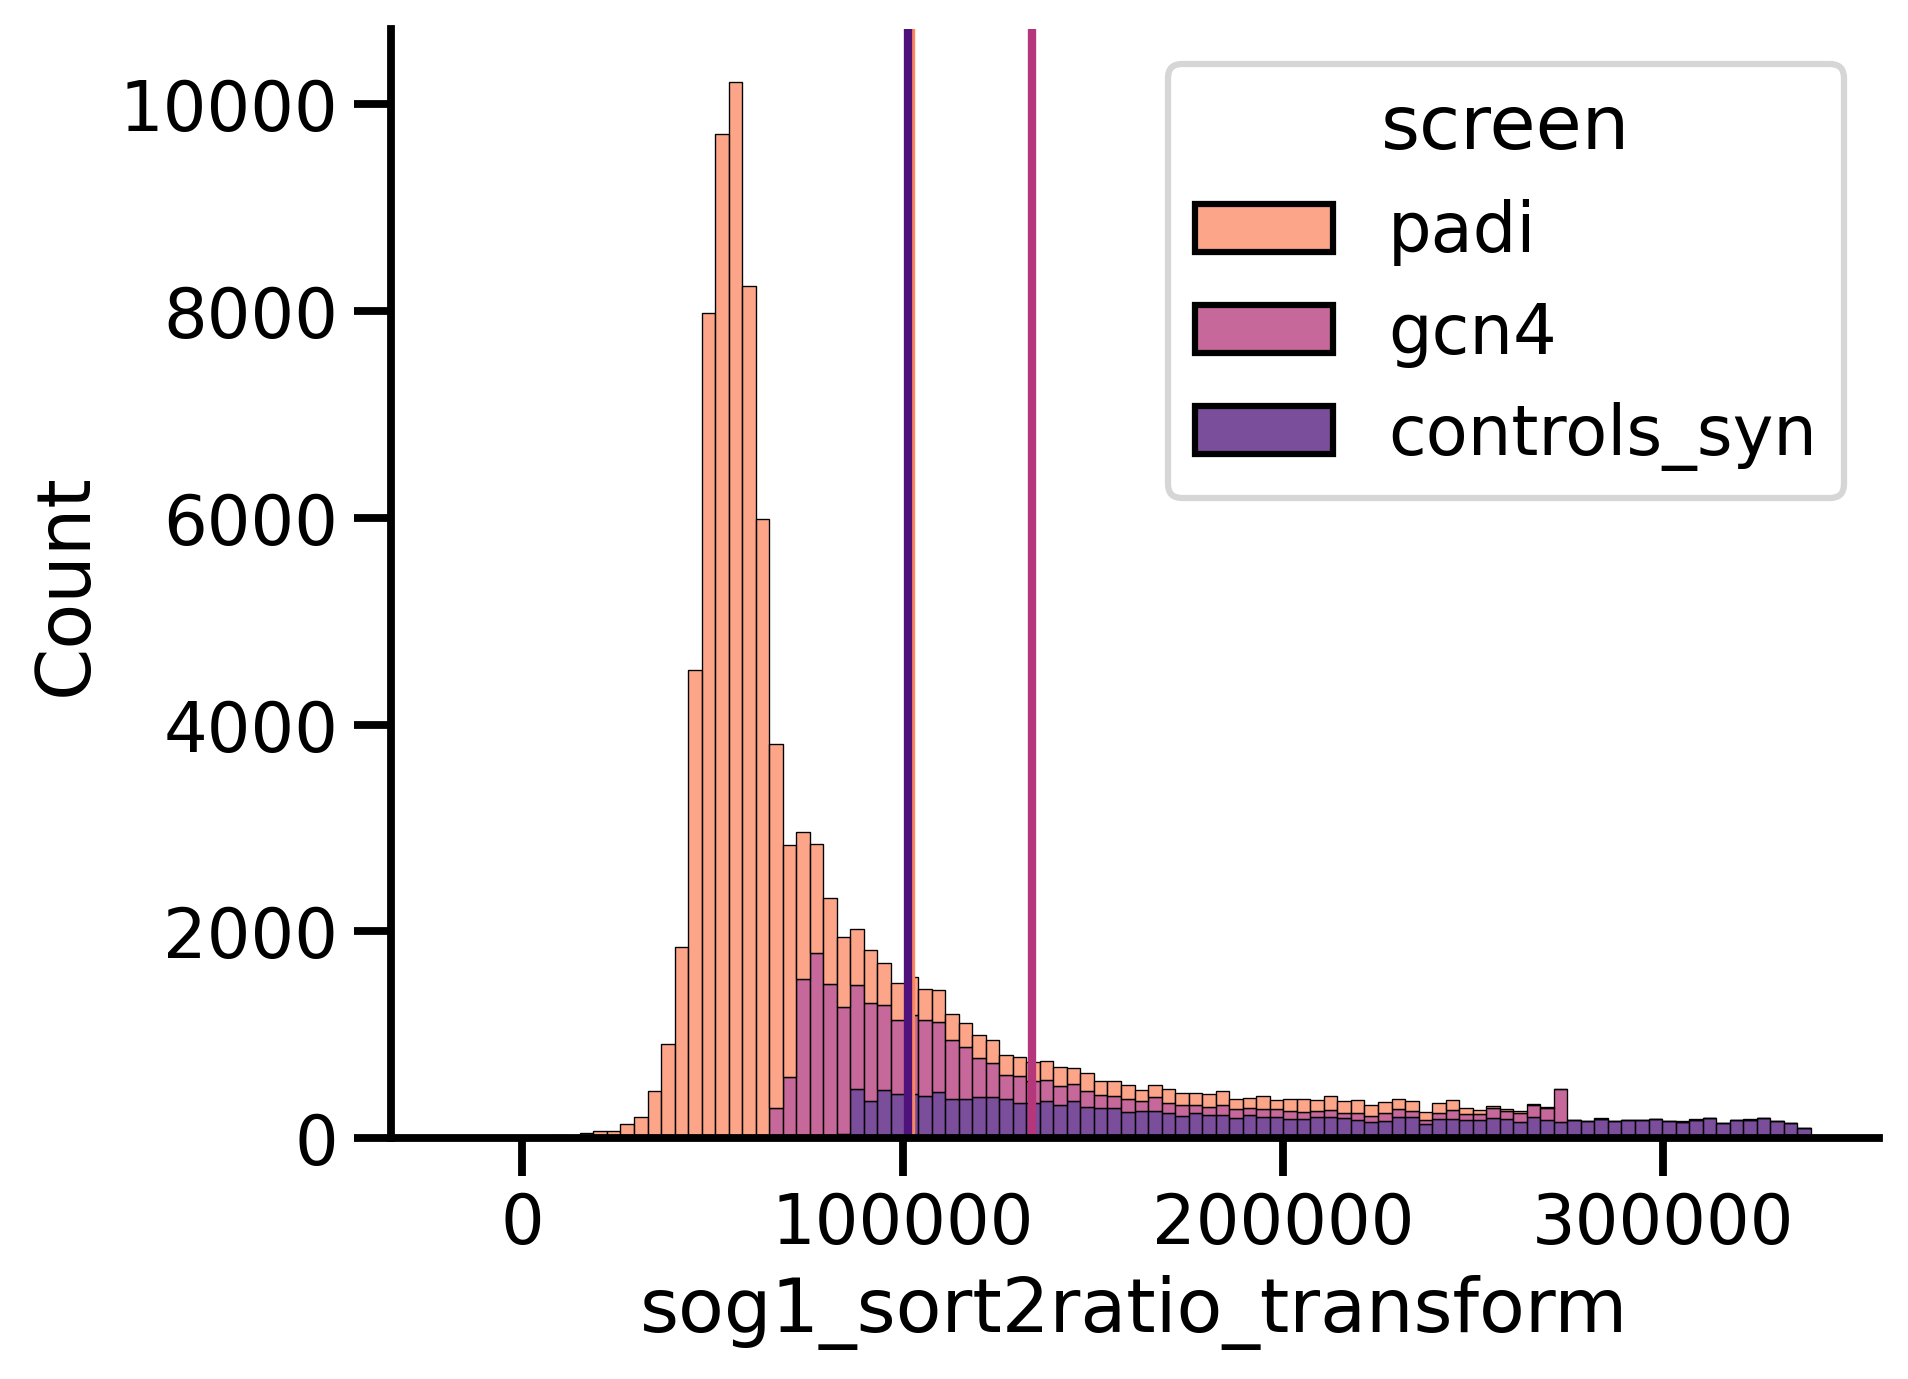

In [101]:
plt.figure(dpi = 300)
palette = sns.color_palette('magma_r', 3)
sns.histplot(data=combined, x="sog1_sort2ratio_transform", hue="screen", multiple="stack", palette = palette, bins = 100)
# plt.xlabel("Sog1 Sort 2 Transform")
plt.axvline(padi_threshold, color = palette[0], lw = 2)
plt.axvline(gcn4_threshold, color = palette[1], lw = 2)
plt.axvline(controls_syn_threshold, color = palette[2], lw = 2)

#lt.axvspan(100000, combined["sog1_sort2ratio_transform"].max(), color='yellow', alpha=0.1)

sns.despine()

In [50]:
test = pd.merge(gcn4, controls_syn, on = "seq", suffixes = ("_gcn4", "_control")).dropna()
test

,seq,score_gcn4,screen_gcn4,score_control,screen_control
0,ASGQANANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDH,31637.98609,gcn4,8930.519463,controls_syn
1,NANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDHSAQRG,35182.01274,gcn4,8217.768578,controls_syn
2,NIAATGPAIAPSQAPAIGGPSALGQYGPNPFVPAAYHYPA,42551.71009,gcn4,13961.152719,controls_syn
3,DALSSSSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAA,13333.59766,gcn4,4885.459740,controls_syn
4,SSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAARQLLE,14917.38884,gcn4,4059.300298,controls_syn
...,...,...,...,...,...
477,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,17261.58387,gcn4,4861.135792,controls_syn
478,PPTDVSLGDELHLDGEDVAMAHADALDDADLDMLGDGDSP,32720.43454,gcn4,6479.384414,controls_syn
479,PPTDVSAGDEAHADGEDVAMAHADAADDADADMAGDGDSP,14676.81276,gcn4,6539.294161,controls_syn
480,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF,262003.24940,gcn4,249619.965442,controls_syn


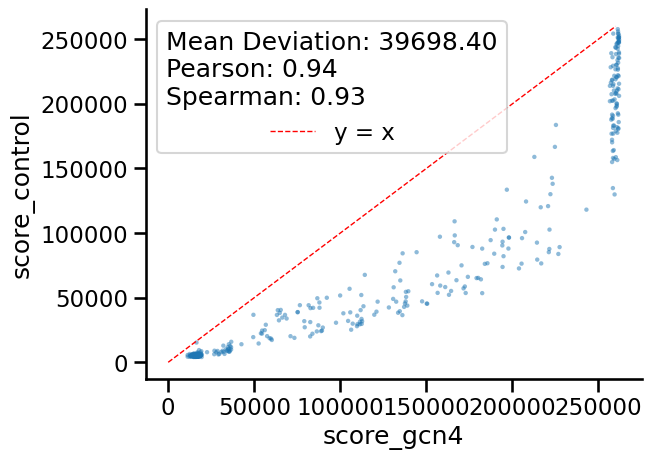

In [59]:
from scipy.stats import spearmanr

ax = sns.scatterplot(data=test, x="score_gcn4", y="score_control", s = 10, edgecolor = "none", alpha = 0.5)
# plt.xlim(0, 250000)
# plt.ylim(0, 250000)
plt.plot([0, 260000], [0, 260000], color='red', linestyle='--', linewidth=1, label='y = x')

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(test["score_gcn4"], test["score_control"])

# Calculate Pearson correlation
correlation, _ = pearsonr(test["score_gcn4"], test["score_control"])
# Calculate deviation from y = x line
test['deviation'] = abs(test["score_gcn4"] - test["score_control"])
mean_deviation = test['deviation'].mean()
# Update legend to include both correlations
plt.legend(title=f"Mean Deviation: {mean_deviation:.2f}\nPearson: {correlation:.2f}\nSpearman: {spearman_corr:.2f}")
sns.despine()

In [466]:
test

,seq,score_gcn4,screen_gcn4,sog1_sort2ratio_transform_gcn4,score_control,screen_control,sog1_sort2ratio_transform_control,deviation
0,ASGQANANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDH,31637.98609,gcn4,86174.839807,8930.519463,controls_syn,90911.684499,4736.844691
1,NANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDHSAQRG,35182.01274,gcn4,89073.519284,8217.768578,controls_syn,90213.630640,1140.111356
2,NIAATGPAIAPSQAPAIGGPSALGQYGPNPFVPAAYHYPA,42551.71009,gcn4,95101.236503,13961.152719,controls_syn,95838.585362,737.348859
3,DALSSSSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAA,13333.59766,gcn4,71203.576799,4885.459740,controls_syn,86950.034498,15746.457699
4,SSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAARQLLE,14917.38884,gcn4,72498.968579,4059.300298,controls_syn,86140.910584,13641.942005
...,...,...,...,...,...,...,...,...
477,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,17261.58387,gcn4,74416.298976,4861.135792,controls_syn,86926.212113,12509.913137
478,PPTDVSLGDELHLDGEDVAMAHADALDDADLDMLGDGDSP,32720.43454,gcn4,87060.180528,6479.384414,controls_syn,88511.092212,1450.911684
479,PPTDVSAGDEAHADGEDVAMAHADAADDADADMAGDGDSP,14676.81276,gcn4,72302.200040,6539.294161,controls_syn,88569.766612,16267.566572
480,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF,262003.24940,gcn4,274591.893901,249619.965442,controls_syn,326638.078936,52046.185035


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


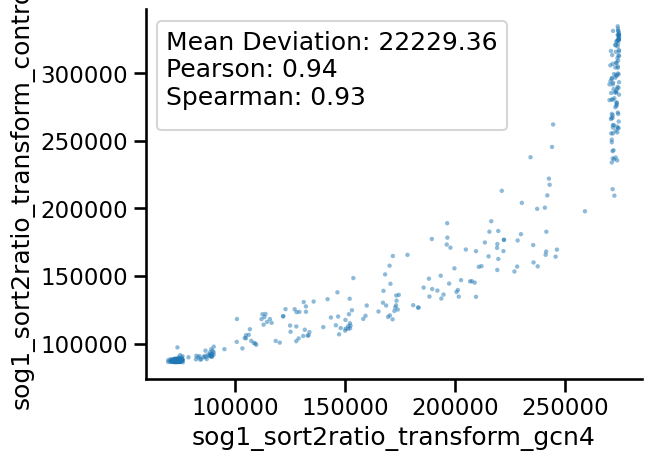

In [467]:
# Scatter plot
ax = sns.scatterplot(data=test, x="sog1_sort2ratio_transform_gcn4", y="sog1_sort2ratio_transform_control", s=10, alpha=0.5, edgecolor='none')
# plt.xlim(0, 10000)
# plt.ylim(0, 10000)
# plt.plot([0, 10000], [0, 10000], color='red', linestyle='--', linewidth=1, label='y = x')

# Calculate deviation from y = x line
test['deviation'] = abs(test["sog1_sort2ratio_transform_gcn4"] - test["sog1_sort2ratio_transform_control"])
mean_deviation = test['deviation'].mean()

# Add mean deviation to the legend
plt.legend(title=f"Mean Deviation: {mean_deviation:.2f}\nPearson: {correlation:.2f}\nSpearman: {spearman_corr:.2f}")

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(test["sog1_sort2ratio_transform_gcn4"], test["sog1_sort2ratio_transform_control"])

# Calculate Pearson correlation
correlation, _ = pearsonr(test["sog1_sort2ratio_transform_gcn4"], test["sog1_sort2ratio_transform_control"])

sns.despine()


In [348]:
# axs = plot_3_ratio_scatters()

# plot_log_reg(sog1_sort2ratio_padi_clean, y="score_sog1_sort2ratio", x="score_padi", ax=axs[0])
# plot_log_reg(sog1_sort2ratio_gcn4_clean, y="score_sog1_sort2ratio", x="score_gcn4", ax=axs[1])
# plot_log_reg(sog1_sort2ratio_controls_syn_clean, y="score_sog1_sort2ratio", x="score_controls_syn", ax=axs[2])

# for ax in axs:
#     ax.set_yscale('log')

In [349]:
# axs = plot_3_ratio_scatters()

# for ax in axs:
#     ax.set_yscale('log')